In [1]:
import os
import numpy as np
import pandas as pd
import ast
import math
import re
import itertools
import random
import json
import matplotlib
from matplotlib.pyplot import plot as plt
from scipy.spatial.distance import squareform
from pylab import *
mpl.use("pgf")
# activate latex text rendering
rc('text', usetex=True)
rc('axes', linewidth=2)
rc('font', weight='bold')
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'text.latex.preamble':r'\usepackage{sfmath} \boldmath'
})
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import allel
# sns.set_theme(style="ticks")
import tikzplotlib

In [16]:
df = pd.read_csv("experimental_results/Chr22/ALL/overall_results.csv", header=0)
df["Missing Rate"] = df["Missing Rate"].astype(object)
df

,Missing Rate,Method,Accuracy
0,0.05,HLA*DEEP,0.953094
1,0.05,HLA*DEEP,0.956573
2,0.05,HLA*DEEP,0.955065
3,0.1,HLA*DEEP,0.953921
4,0.1,HLA*DEEP,0.955845
5,0.1,HLA*DEEP,0.954765
6,0.2,HLA*DEEP,0.953747
7,0.2,HLA*DEEP,0.955271
8,0.2,HLA*DEEP,0.955259
9,0.05,SCDA+,0.952837


In [17]:
df.dtypes

Missing Rate     object
Method           object
Accuracy        float64
dtype: object

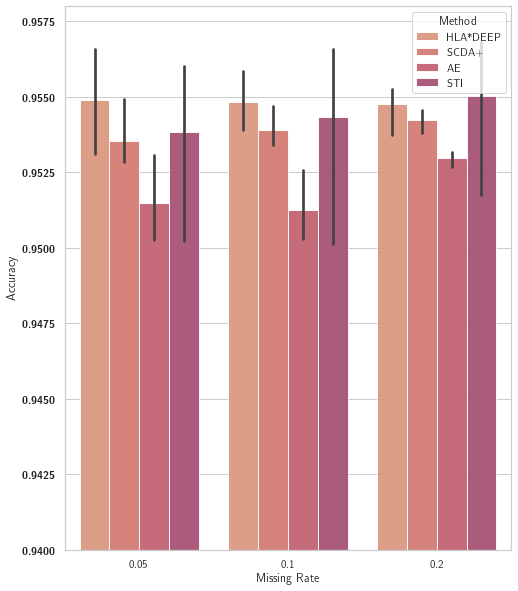

In [29]:
xticks = np.unique(df["Missing Rate"].values)
fig, ax = plt.subplots(figsize=(8,10))
# sns.barplot(
#     data=df,
#     x="Missing Rate", y="Accuracy", hue="Method",
#     markers=True, dashes=False, ax=ax
# )
sns.barplot(
    data=df,
    x="Missing Rate", y="Accuracy", hue="Method",
    errorbar="ci", palette=sns.color_palette("flare"), alpha=0.9, ax=ax
)
# ax.set_xscale("logit")
# ax.set_xticks(xticks) # <--- set the ticks first
# ax.set_xticklabels(xticks)
ax.set_ylim(.94, .958)
# ax.set_axis_labels("", "Body mass (g)")
# ax.legend.set_title("")
# plt.show()
tikzplotlib.save("Chr22_dels.tex", flavor="context")
fig.savefig(f"Chr22_all.pdf", bbox_inches='tight', format="pdf", dpi=800)

In [19]:
bars = [r for r in ax.get_children() if type(r)==Rectangle]
colors = [c.get_facecolor() for c in bars[:-1]]
colors

[(0.8911479999999999, 0.63919675, 0.3084760000000001, 0.9),
 (0.8911479999999999, 0.63919675, 0.3084760000000001, 0.9),
 (0.8911479999999999, 0.63919675, 0.3084760000000001, 0.9),
 (0.81916625, 0.45248075000000004, 0.44550575000000003, 0.9),
 (0.81916625, 0.45248075000000004, 0.44550575000000003, 0.9),
 (0.81916625, 0.45248075000000004, 0.44550575000000003, 0.9),
 (0.626877625, 0.231103375, 0.5306391249999999, 0.9),
 (0.626877625, 0.231103375, 0.5306391249999999, 0.9),
 (0.626877625, 0.231103375, 0.5306391249999999, 0.9),
 (0.39560075, 0.08279225000000001, 0.57616175, 0.9),
 (0.39560075, 0.08279225000000001, 0.57616175, 0.9),
 (0.39560075, 0.08279225000000001, 0.57616175, 0.9)]

In [28]:
sns.color_palette("flare").as_hex()

['#e98d6b', '#e3685c', '#d14a61', '#b13c6c', '#8f3371', '#6c2b6d']